# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали описание проекта. 👍</font>

## Подготовка данных

In [1]:
#открываю, изучаю  датасет
import pandas as pd
import seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st



In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#data.describe()

In [5]:
#считаю дубликаты
data.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Просмотрел весь раздел, но не нашел проверки явных дубликатов. Если мы это сделали, но потом код удалили, то это не совсем правильно, пусть все знают, что мы тщательно анализируем данные.</font>

## Предобработка данных

### Заменим названия столбцов

In [6]:

data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

### Преобразуем данные в нужные типы, обработаем пропуски

In [7]:
#преобразую данные к нужному типу
# преобразую year_of_release к типу int для правильного формата даты
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['year_of_release'] = data['year_of_release'].astype(int)



<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А зачем нам заглушка на значения года выпуска игр? Весь анализ строится на динамике по годам. Мы будем определять актуальный период, который и исследовать. Надо оценить % пропусков и принять правильное решение. Удалить напрочь.</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

In [8]:
data['critic_score'] = data['critic_score'].round()



In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#нашла аббревиатру tbd - гугл подсказывает, что это пропуски
#заменю на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [11]:
#поменяю тип данных в оценке пользователей для удобства будущих расчетов
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype(float)


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Если это заглушка в колонке отзывов пользователей, то мы не много ошиблись, так как в датасете в этой колонке есть значения '0'. Лучше было поставить отрицательное число, а потом при анализе его фильтровать. Или оставить пропуски, а их фильтровать при тестировании гипотез.</font>

In [12]:
data['year_of_release'].unique()


array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,   -1, 1995,
       1991, 1981, 1987, 1980, 1983])

### Посчитаем суммарные продажи во всех регионах

In [13]:
#считаю суммы всех продаж
data['sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['sale'].round()

0        83.0
1        40.0
2        36.0
3        33.0
4        31.0
         ... 
16710     0.0
16711     0.0
16712     0.0
16713     0.0
16714     0.0
Name: sale, Length: 16715, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

Достаточно большое количество пропусков в critic_score, не стала удалять
пропуски и менять тип, потому что удаление приведет к потере большого количества информации. Поменяла тип данных в user_score для удобства будущих расчетов, а аббревиатру tbd заменила на nan, так как гугл подсказал, что это почти тоже самое.  Преобразовала year_of_release к типу int для правильного формата даты. 
Причины пропусков: в некоторых случаях это оправдано тем, что информации на тот момент времени в принципе не было. В другом случае, пропуски могут иметь другое значение - пропуски не ошибка, а часть данных.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что у нас написано в задании: <br><b>Обработайте пропуски при необходимости:<br>
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;<br>
Опишите причины, которые могли привести к пропускам;</b> <br>А мы это не сделали.</font>

In [14]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
 11  sale             16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name  : кол-во 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем понятное решение, у нас всего два пропуска в колонках `name` и `genre`, да еще в этих строках пропуски по отзывам и рейтингу. Может проще удалить?</font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. 

In [15]:
#посмотрю количество
total_years = data.year_of_release.value_counts().to_frame()
total_years

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


<AxesSubplot:>

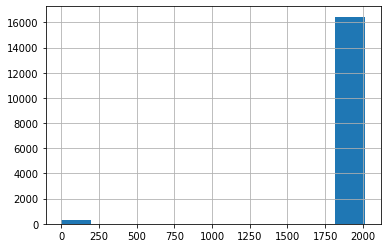

In [16]:
#визуализирую
data['year_of_release'].hist(bins=10)

<AxesSubplot:>

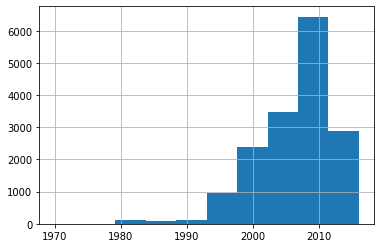

In [17]:
data['year_of_release'].hist(bins=10, range = (1970, 2016))

<AxesSubplot:>

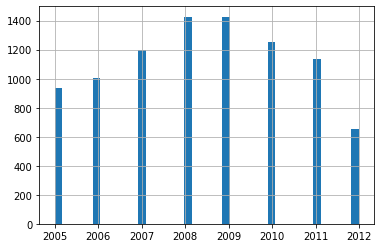

In [18]:
data['year_of_release'].hist(bins=40, range = (2005, 2012))

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Для того что бы гистограмма отражала выпуск игр по годам надо подобрать параметр `bins` равный количеству лет релиза в нашем датасете. Тогда у нас не будет разрывов в графике. </font><br>
<font color='DarkMagenta'>👉 Визуализация подразумевает подписи осей, название графика, при необходимости наличие меток. </font>

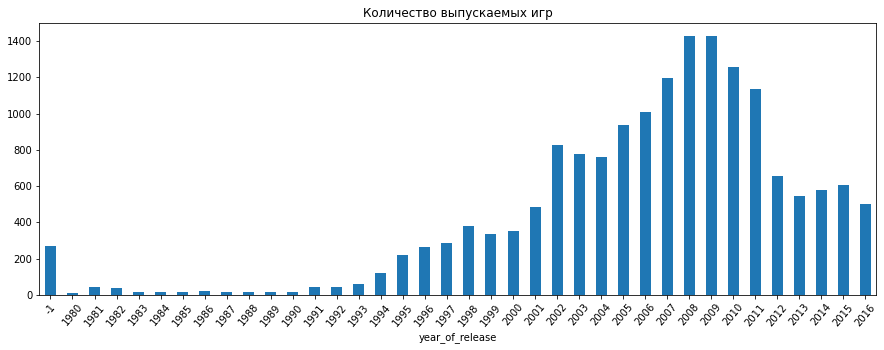

In [19]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', y='name', figsize=(15,5))

plt.title('Количество выпускаемых игр')
plt.xticks(rotation=50)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Для чего предназначена заглушка? Для сохранения значимых данных в других колонках, отличной той, в которой мы заменяем пропуски заглушкой. Но когда мы анализируем данные колонки с заглушками, то последнюю отфильтровываем, так как эти данные не валидны. Если мы этого не делаем, то получается, что мы не совсем правильно понимаем назначение заглушки. Для учебного проекта это не очень критично, а в реальном или тестовом задании потенциального работодателя это показатель нашего не полного понимания работы с данными.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍</font><br>
<font color='DarkMagenta'>👉 А вот данные за нулевой год до нашей эры вызывают недоумение. Какая тогда была игровая платформа? "Табличка глинянная"?</font>

Началом выпуска можно считать 1980 год. Больше всего выспукалось игр в 2008 и 2009 годах.

### Посмотриv, как менялись продажи по платформам.

In [20]:
#изучаю продажи по платформам
platforms_new = data.pivot_table(index = 'platform', values = 'sale', aggfunc = 'sum').sort_values(by = 'sale', ascending = False)
platforms_new.head(10)

,sale
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


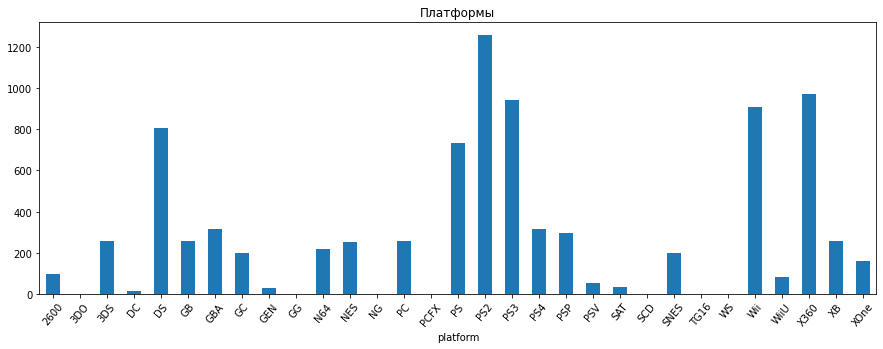

In [21]:
data.groupby('platform')['sale'].sum().plot(kind='bar', y='name', figsize=(15,5))
plt.title('Платформы')
plt.xticks(rotation=50)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы отсортировать платформы по продажам.</font>

array([[<AxesSubplot:title={'center':'sale'}>]], dtype=object)

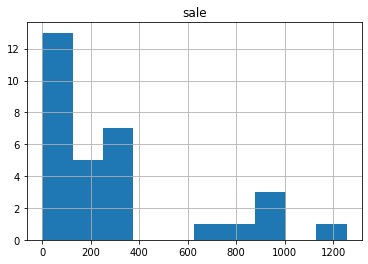

In [22]:
platforms_new.hist()

Text(0.5, 1.0, 'AxesSubplot(0.125,0.125;0.775x0.755)')

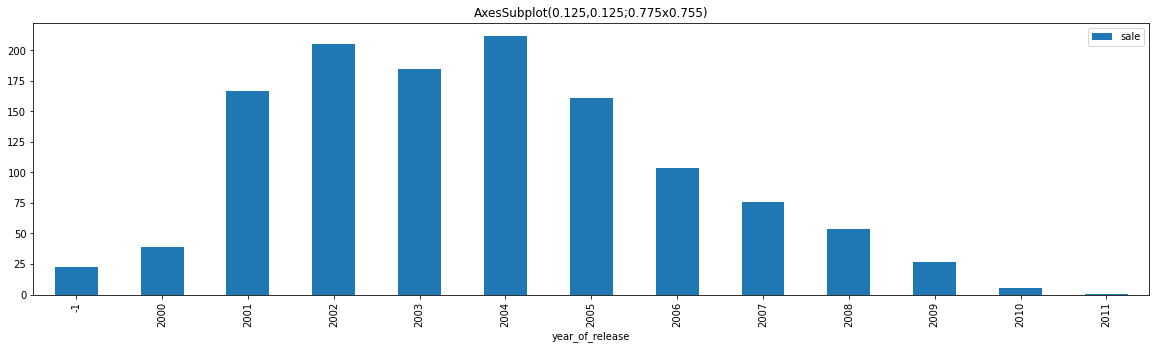

In [23]:
#посмотрю продажи трех наиболее популрных платформ
pl = data[data['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = 'sale', aggfunc = 'sum').plot(kind = 'bar', figsize=(20,5))
plt.title(pl)

Text(0.5, 1.0, 'AxesSubplot(0.125,0.125;0.775x0.755)')

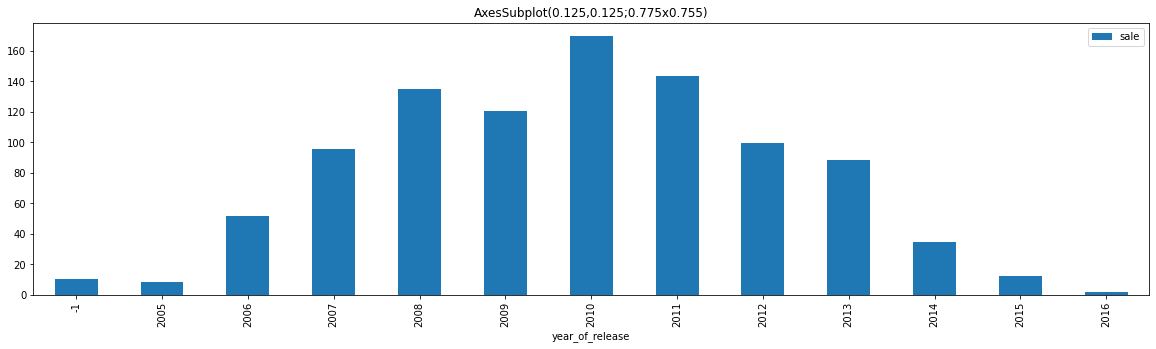

In [24]:
pl_2 = data[data['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'sale', aggfunc = 'sum').plot(kind = 'bar', figsize=(20,5))
plt.title(pl_2)

Text(0.5, 1.0, 'AxesSubplot(0.125,0.125;0.775x0.755)')

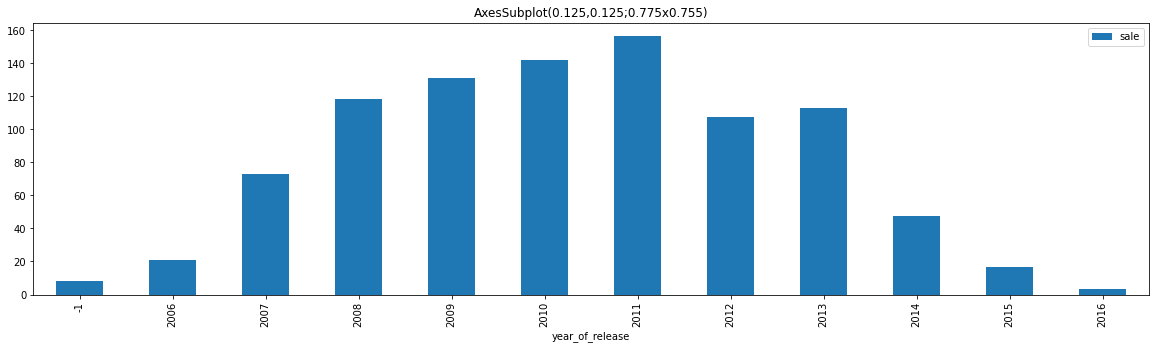

In [25]:
pl_3 = data[data['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'sale', aggfunc = 'sum').plot(kind = 'bar', figsize=(20,5))
plt.title(pl_3)

Наиболее продаваемая платформа -  PS2 (1 млрд). Пик продаж приходился с 2001 по 2004 год.
У платформы Х360 пик продаж приходился на 2010 и 2011 год. Именно тогда у платформы PS2 наименьшее количество продаж. Это может быть связано с ростом продаж PS3.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год).</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 На практике приходится проводить несколько итераций иследования, изменяя период. Период с которого результат анализа перестает изменяться, принимаем актуальным. Плюс учитываем бизнес-практику отрасли, по которой делаем проект. Аналитику все равно приходится погружаться в бизнес процессы, что бы понимать данные датасета, которые как раз и отражают эти процессы. В нашем случае, 5 лет это примерно половина срока жизни платформы.</font>

In [26]:
#для выборки актуального периода возьму промежуток с 2014 по 2016 год
actual = data.query('year_of_release >= 2014').reset_index(drop = True)
actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,-1.0,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-1.0,NaN,7.98


<AxesSubplot:xlabel='year_of_release'>

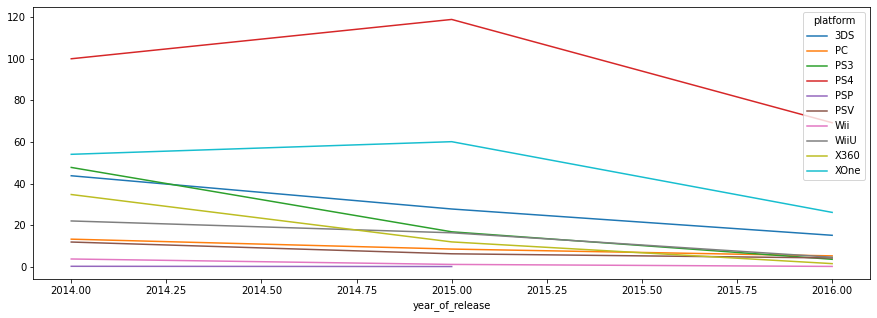

In [27]:
#график по годам
actual.pivot_table(index='year_of_release', columns = 'platform', values='sale', aggfunc='sum').plot(figsize=(15, 5))

Наиболее перспективными сейчас являются PS4 и XOne. Скорее всего последний не вошел в "топ" продаваемых из-за относительно недавнего выхода на рынок.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода мы дальнейший анализ делаем только за этот период.</font>

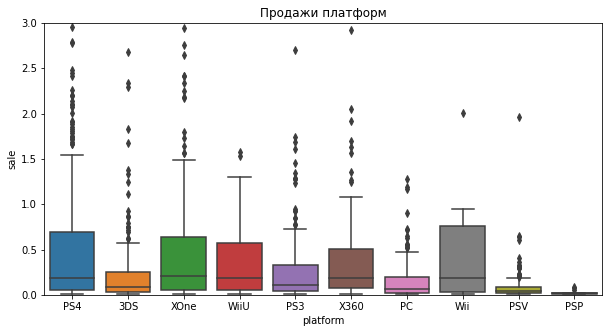

In [28]:
#строю "ящик с усами"
plt.figure(figsize=(10,5))

sns.boxplot(x= actual['platform'], y = actual['sale'], data = actual)
            
           
plt.title('Продажи платформ')
plt.ylim(0,3)
plt.show()



<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь уместна вторая диаграмма размаха со всеми максимумами продаж за актуальный период, а не только с масштабированными данными. А так мы не видим выбросы.</font>

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Строить могу, как еще интерпретировать - не совсем понимаю

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты:</font>
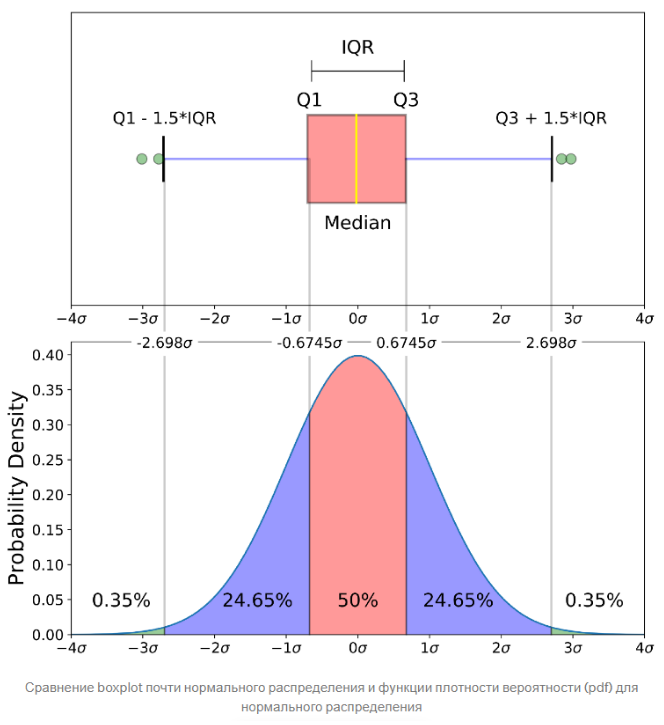

Судя по графику, стоит выделить еще одного претендента - Wii

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [29]:
#изучаю, как влияют на продажи отзывы
#data['critic_score'].unique()

In [30]:
#общий рейтинг
#score_1 = actual.pivot_table(index='platform',columns='genre',values='critic_score')
#score_1

In [31]:
# Комментарий ревьюера 3
len(data)

16715

In [32]:
actual = data.query('year_of_release >= 2014').reset_index(drop = True)
actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,-1.0,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,-1.0,NaN,7.98


In [33]:
data_2 = actual.query('user_score != -1')


In [34]:
# Комментарий ревьюера 3
len(data)

16715

In [35]:
data_2['user_score'].min()



0.2

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Вот такой фильтрацией мы удалили более половины данных в исходноим датасете.</font>
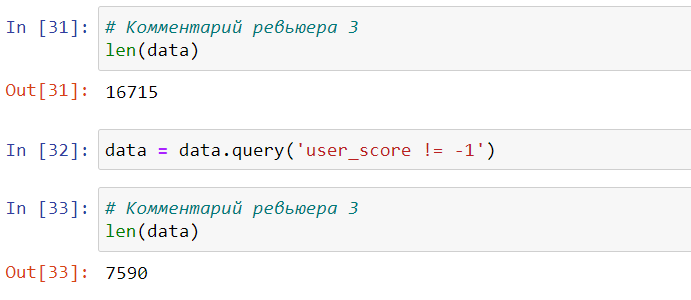

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

In [36]:
# Комментарий ревьюера 4
data_2.year_of_release.min()

2014

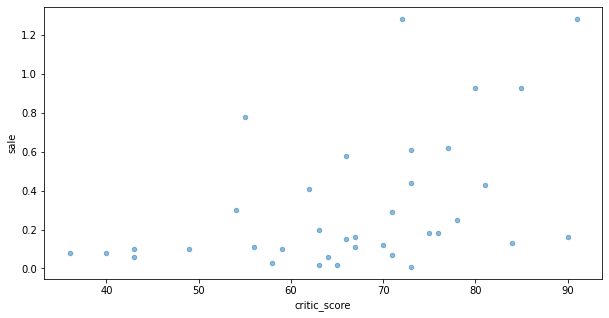

In [37]:
#выбираю для проверки PS3
PS3 = data_2.loc[data_2['platform']=='PS3'].plot(kind='scatter', 
        y='sale' , x='critic_score', alpha=0.5, figsize=(10,5))
#PS3

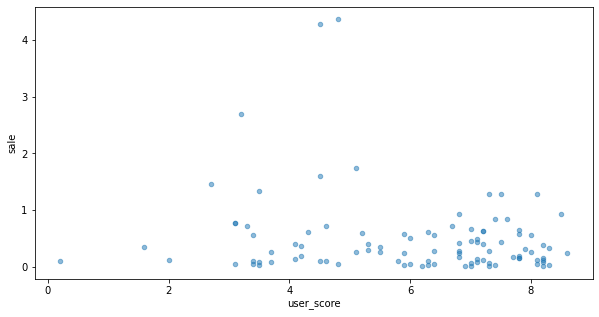

In [38]:
PS3 = data_2.loc[data_2['platform']=='PS3'].plot(kind='scatter', 
        y='sale' , x='user_score', alpha=0.5, figsize=(10,5))

In [39]:
#строю хитмэп для корреляции
def heatmap(PS3):

    plt.figure(figsize=(15,5))
    plt.title('Корреляция оценки критиков и пользователей PS3')
    sns.heatmap(data_2[['critic_score','user_score','sale']].corr(), annot=True)
    
    
    plt.show()
   
   

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠  А мы забыли отфильтровать заглушки в оценках пользователей.  И корреляцию считаем с заглушками.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена.</font>
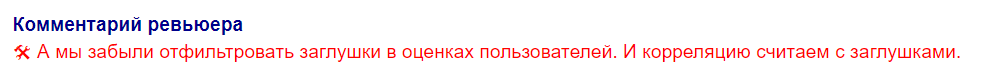

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Ошибка опять не исправлена, анализ проводится с заглушкой:</font>
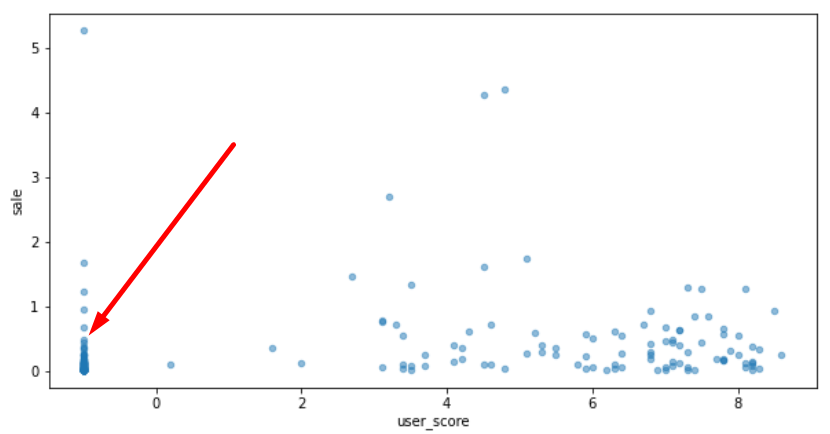

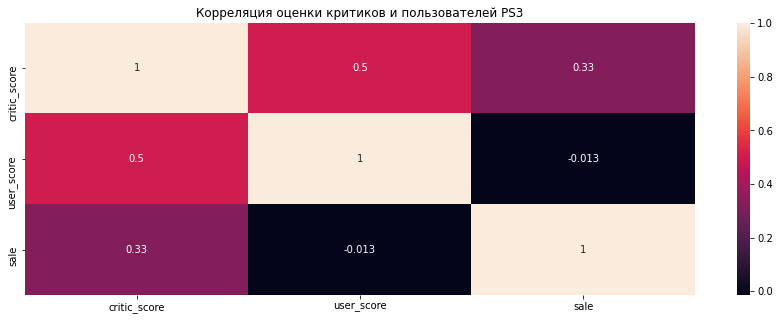

In [40]:
heatmap(PS3)


In [ ]:
data.info()

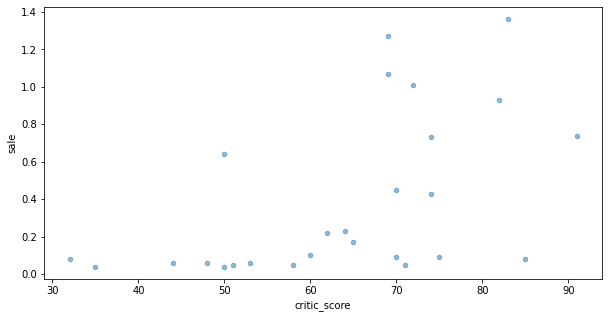

In [41]:
X360 = data_2.loc[data_2['platform']=='X360'].plot(kind='scatter', 
        y='sale' , x='critic_score', alpha=0.5, figsize=(10,5))

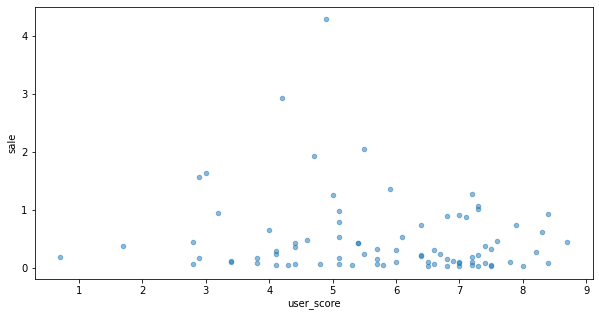

In [42]:
X360 = data_2.loc[data_2['platform']=='X360'].plot(kind='scatter', 
        y='sale' , x='user_score', alpha=0.5, figsize=(10,5))

In [43]:
def heatmap_2(X360):

    plt.figure(figsize=(15,5))
    plt.title('Корреляция оценки критиков и пользователей X360')
    sns.heatmap(data_2[['critic_score','user_score','sale']].corr(), annot=True)
    
    
    plt.show()

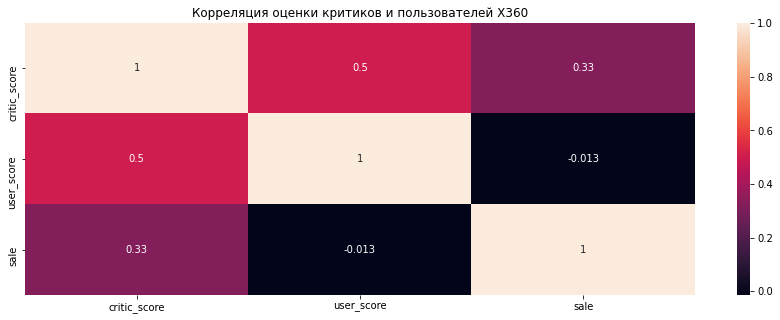

In [44]:
heatmap_2(X360)

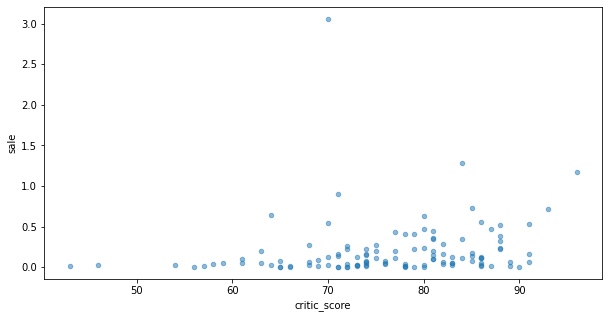

In [45]:
PC = data_2.loc[data_2['platform']=='PC'].plot(kind='scatter', 
        y='sale' , x='critic_score', alpha=0.5, figsize=(10,5))

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 По этой платформе нет диаграммы рассеяния по отзывам пользователей.</font>

In [46]:
def heatmap_3(PC):

    plt.figure(figsize=(15,5))
    plt.title('Корреляция оценки критиков и пользователей X360')
    sns.heatmap(data_2[['critic_score','user_score','sale']].corr(), annot=True)
    
    
    plt.show()

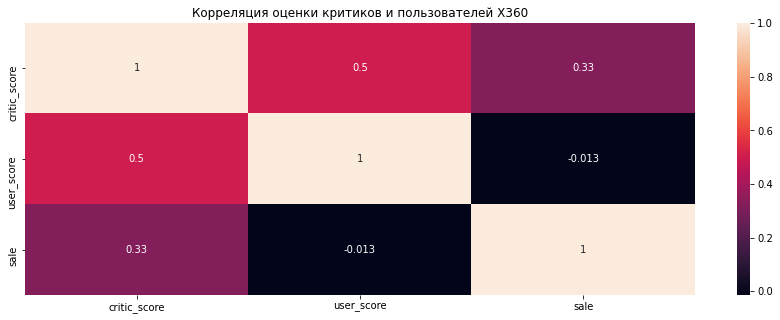

In [47]:
heatmap_3(PC)

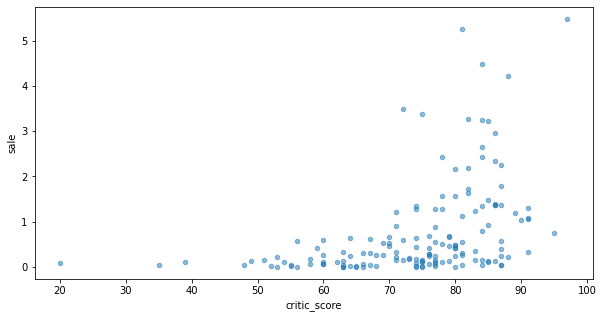

In [48]:
XOne = data_2.loc[data_2['platform']=='XOne'].plot(kind='scatter', 
        y='sale' , x='critic_score', alpha=0.5, figsize=(10,5))

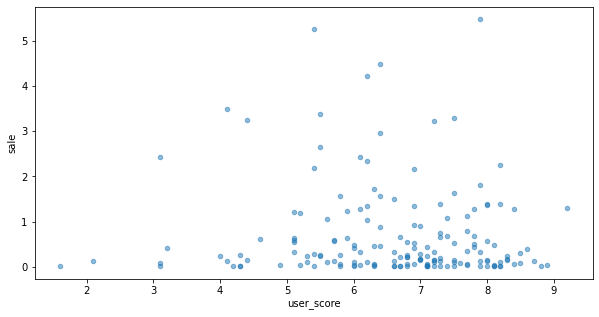

In [49]:
XOne = data_2.loc[data_2['platform']=='XOne'].plot(kind='scatter', 
        y='sale' , x='user_score', alpha=0.5, figsize=(10,5))

In [50]:
def heatmap_3(XOne):

    plt.figure(figsize=(15,5))
    plt.title('Корреляция оценки критиков и пользователей X360')
    sns.heatmap(data_2[['critic_score','user_score','sale']].corr(), annot=True)
    
    
    plt.show()

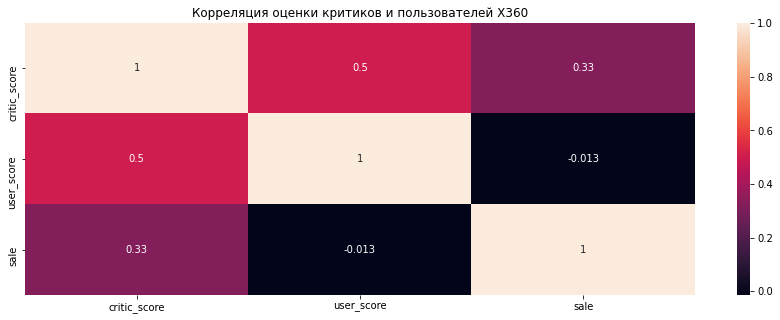

In [51]:
heatmap_3(XOne)

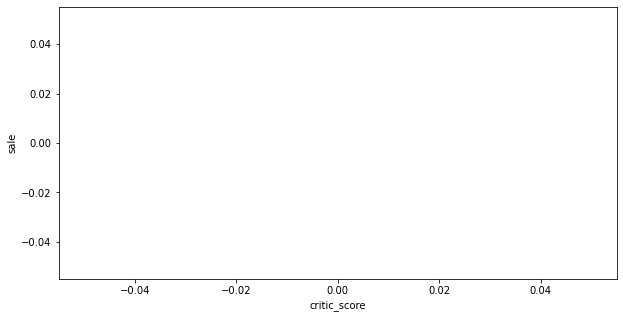

In [52]:
Wii = data_2.loc[data_2['platform']=='Wii'].plot(kind='scatter', 
        y='sale' , x='critic_score', alpha=0.5, figsize=(10,5))

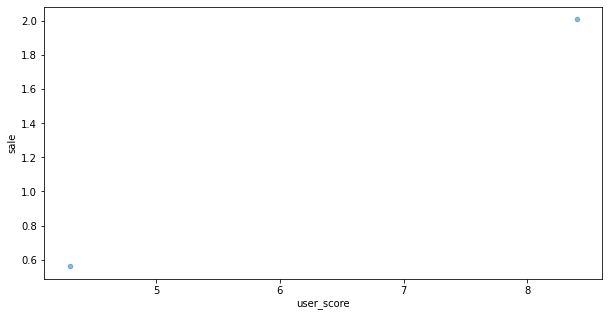

In [53]:
Wii = data_2.loc[data_2['platform']=='Wii'].plot(kind='scatter', 
        y='sale' , x='user_score', alpha=0.5, figsize=(10,5))

In [54]:
def heatmap_3(Wii):

    plt.figure(figsize=(15,5))
    plt.title('Корреляция оценки критиков и пользователей X360')
    sns.heatmap(data_2[['critic_score','user_score','sale']].corr(), annot=True)
    
    
    plt.show()

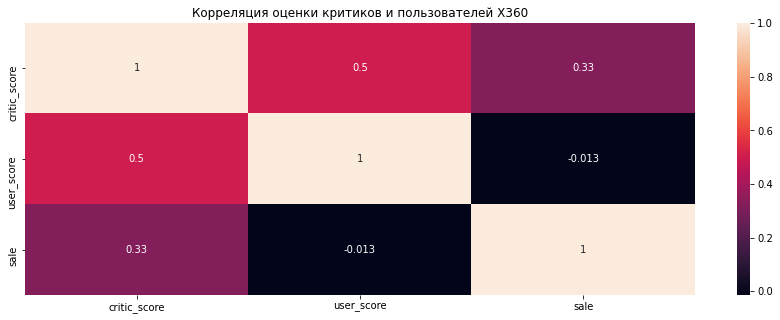

In [55]:
heatmap_3(Wii)

Исходя из полученных результатов,можно сказать,что корреляционная зависимость между рейтингом критиков и продажами слабый, но есть (0,33). Корреляционной зависимости между рейтингом пользователей и продажами практически нет, очень слабая связь (-0,013).

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.<br>Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
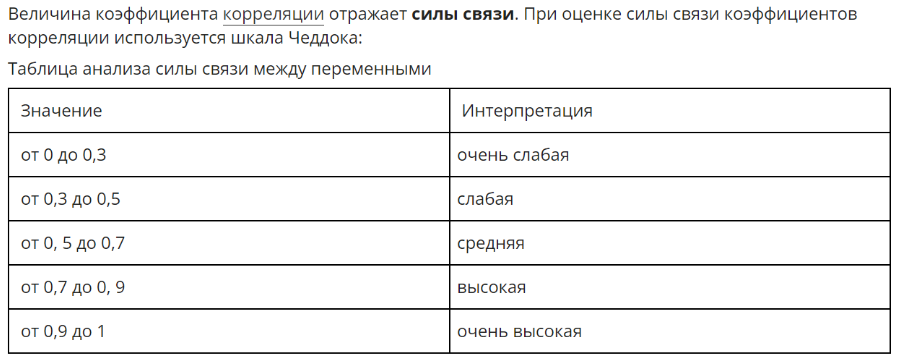

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну и не полностью. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

### Посмотрим на общее распределение игр по жанрам.

In [56]:
#изучаю количество игр по жанрам
g_new = actual['genre'].value_counts()
g_new

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

<AxesSubplot:ylabel='sale'>

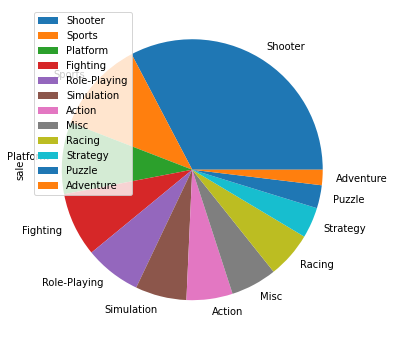

In [57]:
actual.pivot_table(index = 'genre', values = 'sale', aggfunc = 'median').sort_values(ascending=False, by = 'sale').plot(kind='pie', figsize=(10,6), y='sale')


<AxesSubplot:xlabel='genre'>

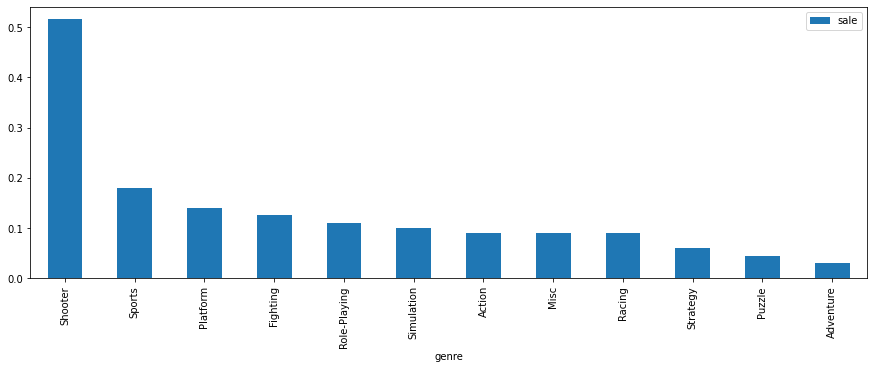

In [58]:
actual.pivot_table(index = 'genre', values = 'sale', aggfunc = 'median').sort_values(ascending=False, by = 'sale').plot(kind='bar', figsize=(15,5))


Самым популярным считается жанр Shooter и Sports. Жанры Adventure и Puzzle больше всего отстают.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Для этого надо использовать параметр `autopct`.</font>

## Составляем портрет пользователя каждого региона

### Самые популярные платформы (топ-5) и самые популярные жанры (топ-5)

In [59]:
# для NA

#na = actual['na_sales'].value_counts()
#na

In [60]:
# выделяю топ-5 платформ
city_na = actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc=['count','sum'])
city_na.columns = ['count', 'sum']
city_na = city_na.sort_values('sum', ascending = False)
city_na.head(5)

,count,sum
platform,,
PS4,376,98.61
XOne,228,81.27
X360,111,28.30
3DS,212,22.64
PS3,219,22.05


array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='sum'>],
      dtype=object)

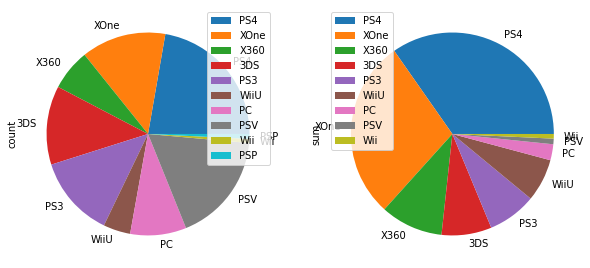

In [61]:
city_na.plot(kind='pie', figsize=(10,6), subplots=True)

Очевидные лидеры - X360	и Wii. 	

In [62]:
#выделяю топ-5 жанров
city_na_2 = actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc=['count','sum'])
city_na_2.columns = ['count', 'sum']
city_na_2 = city_na_2.sort_values('sum', ascending = False)
city_na_2.head(5)

,count,sum
genre,,
Shooter,128,79.02
Action,619,72.53
Sports,161,46.13
Role-Playing,221,33.47
Misc,113,15.05


array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='sum'>],
      dtype=object)

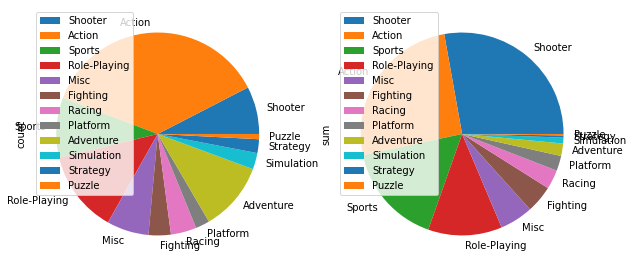

In [63]:
city_na_2.plot(kind='pie', figsize=(10,6), subplots=True)

Лидерами являются игры в стиле Action и Shooter.

In [64]:
#actual[['rating','na_sales']].corr()
#data['rating'].corr(data['na_sales'])    


In [65]:
#для EU
# выделяю топ-5 платформ
city_eu = actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc=['count','sum'])
city_eu.columns = ['count', 'sum']
city_eu = city_eu.sort_values('sum', ascending = False)
city_eu.head(5)

,count,sum
platform,,
PS4,376,130.04
XOne,228,46.25
PS3,219,25.54
PC,151,17.97
3DS,212,16.12


array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='sum'>],
      dtype=object)

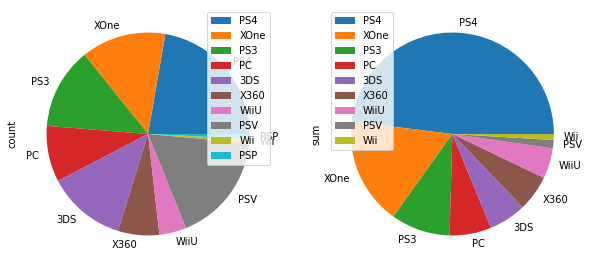

In [66]:
city_eu.plot(kind='pie', figsize=(10,6), subplots=True)

In [67]:
#выделяю топ-5 жанров
city_eu_2 = actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc=['count','sum'])
city_eu_2.columns = ['count', 'sum']
city_eu_2 = city_eu_2.sort_values('sum', ascending = False)
city_eu_2.head(5)

,count,sum
genre,,
Action,619,74.68
Shooter,128,65.52
Sports,161,45.73
Role-Playing,221,28.17
Racing,69,14.13


array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='sum'>],
      dtype=object)

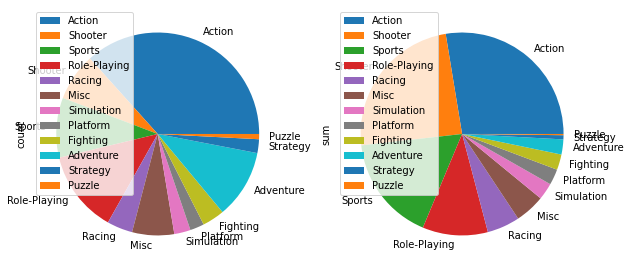

In [68]:
city_eu_2.plot(kind='pie', figsize=(10,6), subplots=True)

In [69]:
#для JP
# выделяю топ-5 платформ
city_jp = actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc=['count','sum'])
city_jp.columns = ['count', 'sum']
city_jp = city_jp.sort_values('sum', ascending = False)
city_jp.head(5)

,count,sum
platform,,
3DS,212,44.24
PS4,376,15.02
PSV,295,14.54
PS3,219,11.22
WiiU,73,7.31


array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='sum'>],
      dtype=object)

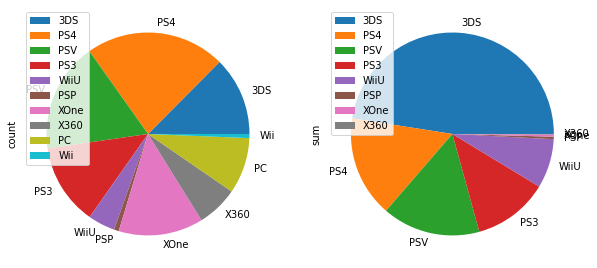

In [70]:
city_jp.plot(kind='pie', figsize=(10,6), subplots=True)

In [71]:
#выделяю топ-5 жанров
city_jp_2 = actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc=['count','sum'])
city_jp_2.columns = ['count', 'sum']
city_jp_2 = city_jp_2.sort_values('sum', ascending = False)
city_jp_2.head(5)

,count,sum
genre,,
Role-Playing,221,31.16
Action,619,29.58
Fighting,60,6.37
Misc,113,5.61
Shooter,128,4.87


array([<AxesSubplot:ylabel='count'>, <AxesSubplot:ylabel='sum'>],
      dtype=object)

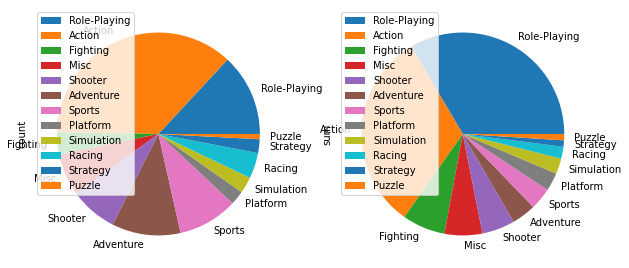

In [72]:
city_jp_2.plot(kind='pie', figsize=(10,6), subplots=True)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хорошо сделан анализ и визуализирован круговыми диаграммами. А вот данные не вошедшие в ТОП, как правило, суммируют и выводят отдельной группой "Другие". Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.  Примерно вот так:</font>
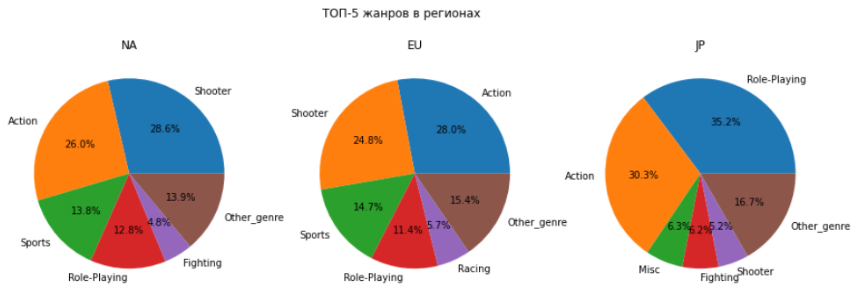

### Влияние  рейтинга ESRB на продажи в отдельном регионе

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Что у нас написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>Не учитывайте в работе данные за предыдущие годы.</b> <br>После определения актуального периода мы дальнейший анализ делаем только за этот период.</font>

In [73]:
actual.rating.unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 А исходный датасет мы выше испортили фильтрацией.</font>

In [74]:
#заменю тогда nanы на буквенное обозначение, в интернете написано, что RP - не присвоен. Тогда так и заменю.
actual['rating'] = actual['rating'].fillna('no_ESRB')

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Не совсем корректно, 'RP' обозначения рейтинга 'ESRB', а наши пропуски означают, что игры были выпущены в других регионах. Лучше было поставить, что-то типа 'no_ESRB'. А вот если бы в датасете было много 'RP', тогда бы это была бы ошибка.</font>

In [75]:
actual['rating'].isna().sum()

0

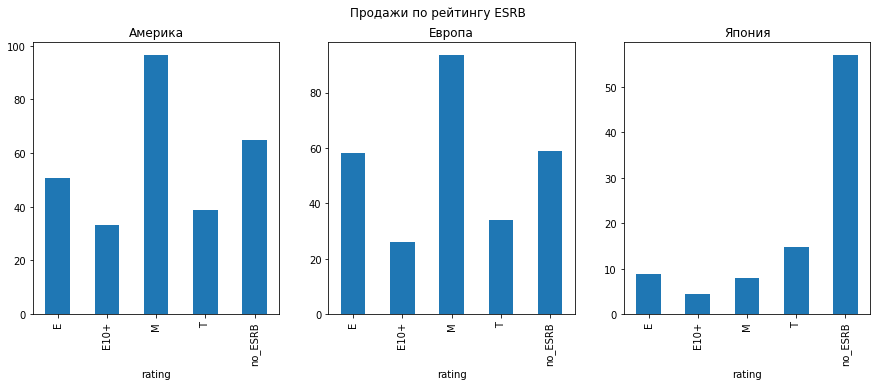

In [76]:
region_sale = ['na_sales', 'eu_sales', 'jp_sales']
regions = ['Америка', 'Европа','Япония']


fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Продажи по рейтингу ESRB')
for i, sale in enumerate(region_sale):
    for region in regions:
        actual.groupby('rating')[sale].sum().plot(kind='bar', ax=ax[i], title=regions[i])

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

Рейтинг платформ у NA и EU практически не отличается. У Японии более популярными являются "местные" платформы. Лидирующие позиции у NA и EU занимают Экшены и Шутеры, в то время как у Японии на первом месте Role-Playing и экшены. Игры рейтинга "М" практически одинаково востребованы в Северной Америке и Европе, в Японии лидирующую позицию занимают игры рейтинга "Т". 

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных не поставили заглушку на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [77]:
# Комментарий ревьюера 2
temp = actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_ESRB    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

##  Проверка гипотез

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 Для анализа не используется актуальный период.</font>

In [78]:
# Комментарий ревьюера 2
data.year_of_release.min()

-1

Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные



In [79]:
#Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
XOne = actual[(actual['platform'] == 'XOne')& (actual['user_score'] >0)]['user_score']
PC = actual[(actual['platform'] == 'PC') &(actual['user_score'] >0)]['user_score']
result = st.ttest_ind(XOne, PC)
alpha = .05


print('p-значение:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')



p-значение: 0.10450507919348415
Не отвергаем Н0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

На имеющихся данных, на уровне значимости 5% есть основания не отвергать нулевую гипотезу о равенстве средних значений пользовательских рейтингов платформ Xbox One и PC.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>
<br>
<font color='DarkMagenta'>👉 Только гипотезы формулируют до, а не после их тестирования.</font>

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [80]:
#Средние пользовательские рейтинги жанров Action
# и Sports разные.

Action = actual[(actual['genre'] == 'Action')& (actual['user_score'] >0)]['user_score']
Sports = actual[(actual['genre'] == 'Sports') &(actual['user_score'] >0)]['user_score']
result = st.ttest_ind(Action, Sports)
alpha = .05


print('p-значение:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

p-значение: 2.8711147985105864e-19
Отвергаем Н0



На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Лучше было написать, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

Нулевая гипотеза была сформулирована согласно поставленному вопросу, альтернативная - противоположно ей. Я выбрала st.ttest_ind (t-тест Студента)- для средних двух независимых выборок. Он наиболее оптималенен в данном анализе. 

# Общий вывод:


**По результатам анализа,можно сделать вывод, что перспективными платформами являются PС 4 и XOne**

Рейтинг по платформам и жанрам в NA и EU практически не отличается, в Японии большее внимание уделяется платформам местного производителя. Наиболее популярными являются жанры Action и Sports, на них и стоит акцентировать внимание. В Японии Role-Playing и Action.
Зависимости продаж от рейтинга критиков и пользователей практически нет. В Америке и Европе наиболее распространены игры рейтинга "М", а в Японии "Т".




<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, надо просто акцентировать на какие игры тратить рекламный бюджет. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Эллина, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать проверку явных дубликатов. Сделать анализ причин и методов обработки пропусков. Переделать проект в соответствии с требованиями к оформлению проекта. Выбрать меньший актуальный период для прогнозирования. Анализ проводить только за актуальный период. Переделать раздел анализа влияния отзывов на продажи. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха. Сделать портфель пользователя по возрастному рейтингу согласно задания. Необходимо правильно сформулировать гипотезы в тесте жанров. Необходимо сделать пояснения по разделу гипотез согласно заданию.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера </b></font><br><br>
<font color='DarkGreen'>👌 Эллина! Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>